In [1]:
# Projet Python 
# Objectif: nettoyer la base de données de l'OCDE pour la rendre compréhensible
# Données 2019

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# Création de la base de données

## Traitement des données de l'OCDE
Objectif: Importer, traiter et sélectionner les données de l'OCDE.
On se concentre ici sur les données "pratiques" reflétant la réalité de la situation dans les pays étudiés. 

In [3]:
df2 = pd.read_csv('C:/Users/julie/Documents/ENSAE/2A/S1/python/projet/oecd3.csv', sep=',', encoding='latin-1')
#les données sont récupérées en téléchargeant les données via un fichier csv recueilli sur la page: https://stats.oecd.org/viewhtml.aspx?datasetcode=GIDDB2019&lang=fr

In [4]:
# autre méthode 
# df2=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')

In [5]:
df2.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [6]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_pratique=df2[df2['Variable']=="Pratique"]

In [7]:
#on cherche à renommer les colonnes
df_pratique.columns
df_pratique.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code'}, inplace=True)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
df_pratique2=df_pratique[df_pratique['region_monde']=="ALL"]

In [9]:
df_pratique2.head(5)

,region_monde,region,Country Code,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [10]:
df_pratique_final=df_pratique2[['Country Code', 'Pays', 'Revenu', 'VAR', 'Value']]

In [11]:
df_pratique_final.head(5)

,Country Code,Pays,Revenu,VAR,Value
29,AUS,Australie,ÃlevÃ©,DF_HR_PRACT,1.82
34,AUS,Australie,ÃlevÃ©,RPI_VAW_PRACT,16.90
36,AUS,Australie,ÃlevÃ©,RPI_MW_PRACT,105.50
38,AUS,Australie,ÃlevÃ©,RPI_RA_PRACT,11.00
42,AUS,Australie,ÃlevÃ©,RAPFR_SAFS_PRACT,50.00


In [12]:
df_pratique_final.shape

(3426, 5)

## Traitement des données de la BM 
Objectif: Obtenir pour chaque pays de la base de données le PIB par tête en 2019

In [13]:
# On veut faire un left join avec la bdd de la BM pour avoir la variable gdp qui nous intéresse
df=df=pd.read_csv('C:/Users/julie/Documents/ENSAE/2A/S1/python/projet/WDIData.csv')

In [14]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_bm2=df[["Country Name", "Country Code", "Indicator Name", "2019"]]

In [16]:
df_bm2.head(5)

,Country Name,Country Code,Indicator Name,2019
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),43.640661
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",28.841150
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",73.589886
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,NaN


In [17]:
df_bm3=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]

In [18]:
df_bm3.head(5)

,Country Name,Country Code,Indicator Name,2019
469,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),1499.256275
1912,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),1843.558468
3355,Arab World,ARB,GDP per capita (constant 2015 US$),6206.570758
4798,Caribbean small states,CSS,GDP per capita (constant 2015 US$),10050.327615
6241,Central Europe and the Baltics,CEB,GDP per capita (constant 2015 US$),14823.026908


## Fusion de nos deux bases de données
Objectif: obtenir un df contenant les données de l'OCDE ainsi que le PIB par tête pour chaque pays 

In [19]:
df_oecd_gdp=df_pratique_final.merge(df_bm3, on='Country Code', how='left')

In [20]:
df_oecd_gdp

,Country Code,Pays,Revenu,VAR,Value,Country Name,Indicator Name,2019
0,AUS,Australie,ÃlevÃ©,DF_HR_PRACT,1.82,Australia,GDP per capita (constant 2015 US$),58923.208212
1,AUS,Australie,ÃlevÃ©,RPI_VAW_PRACT,16.90,Australia,GDP per capita (constant 2015 US$),58923.208212
2,AUS,Australie,ÃlevÃ©,RPI_MW_PRACT,105.50,Australia,GDP per capita (constant 2015 US$),58923.208212
3,AUS,Australie,ÃlevÃ©,RPI_RA_PRACT,11.00,Australia,GDP per capita (constant 2015 US$),58923.208212
4,AUS,Australie,ÃlevÃ©,RAPFR_SAFS_PRACT,50.00,Australia,GDP per capita (constant 2015 US$),58923.208212
...,...,...,...,...,...,...,...,...
3421,ZWE,Zimbabwe,Tous les groupes de revenu,DF_CM_PRACT,22.90,Zimbabwe,GDP per capita (constant 2015 US$),1367.676915
3422,SRB,Serbie,Tous les groupes de revenu,DF_CM_PRACT,3.50,Serbia,GDP per capita (constant 2015 US$),6562.670592
3423,MNE,MontTnTgro,Tous les groupes de revenu,DF_CM_PRACT,2.40,Montenegro,GDP per capita (constant 2015 US$),7684.151468
3424,XKO,Kosovo,Tous les groupes de revenu,DF_CM_PRACT,4.40,NaN,NaN,NaN


In [21]:
df_oecd_gdp.rename(columns={'2019': 'GDP_per_capita_2019'}, inplace=True)

In [22]:
df_oecd_gdp

,Country Code,Pays,Revenu,VAR,Value,Country Name,Indicator Name,GDP_per_capita_2019
0,AUS,Australie,ÃlevÃ©,DF_HR_PRACT,1.82,Australia,GDP per capita (constant 2015 US$),58923.208212
1,AUS,Australie,ÃlevÃ©,RPI_VAW_PRACT,16.90,Australia,GDP per capita (constant 2015 US$),58923.208212
2,AUS,Australie,ÃlevÃ©,RPI_MW_PRACT,105.50,Australia,GDP per capita (constant 2015 US$),58923.208212
3,AUS,Australie,ÃlevÃ©,RPI_RA_PRACT,11.00,Australia,GDP per capita (constant 2015 US$),58923.208212
4,AUS,Australie,ÃlevÃ©,RAPFR_SAFS_PRACT,50.00,Australia,GDP per capita (constant 2015 US$),58923.208212
...,...,...,...,...,...,...,...,...
3421,ZWE,Zimbabwe,Tous les groupes de revenu,DF_CM_PRACT,22.90,Zimbabwe,GDP per capita (constant 2015 US$),1367.676915
3422,SRB,Serbie,Tous les groupes de revenu,DF_CM_PRACT,3.50,Serbia,GDP per capita (constant 2015 US$),6562.670592
3423,MNE,MontTnTgro,Tous les groupes de revenu,DF_CM_PRACT,2.40,Montenegro,GDP per capita (constant 2015 US$),7684.151468
3424,XKO,Kosovo,Tous les groupes de revenu,DF_CM_PRACT,4.40,NaN,NaN,NaN


In [23]:
df_oecd_gdp=df_oecd_gdp[["Country Code", "Country Name", "Revenu", "VAR", "Value", "GDP_per_capita_2019"]]

In [24]:
df_oecd_gdp
# On obtient le df voulu: les données de l'ocde avec le PIB par habitant associé à chaque personne

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
0,AUS,Australia,ÃlevÃ©,DF_HR_PRACT,1.82,58923.208212
1,AUS,Australia,ÃlevÃ©,RPI_VAW_PRACT,16.90,58923.208212
2,AUS,Australia,ÃlevÃ©,RPI_MW_PRACT,105.50,58923.208212
3,AUS,Australia,ÃlevÃ©,RPI_RA_PRACT,11.00,58923.208212
4,AUS,Australia,ÃlevÃ©,RAPFR_SAFS_PRACT,50.00,58923.208212
...,...,...,...,...,...,...
3421,ZWE,Zimbabwe,Tous les groupes de revenu,DF_CM_PRACT,22.90,1367.676915
3422,SRB,Serbia,Tous les groupes de revenu,DF_CM_PRACT,3.50,6562.670592
3423,MNE,Montenegro,Tous les groupes de revenu,DF_CM_PRACT,2.40,7684.151468
3424,XKO,NaN,Tous les groupes de revenu,DF_CM_PRACT,4.40,NaN


# Analyse des données

#### Testons le lien entre les violences faites aux femmes (via la variable RPI_VAW_PRACT: Violences à l’encontre des femmes : pourcentage de femmes ayant déjà subi des violences sexuelles ou physique de la part d’un partenaire) et le PIB des pays.

In [25]:
df_violences=df_oecd_gdp[df_oecd_gdp['VAR']=="RPI_VAW_PRACT"]

In [26]:
df_violences

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
1,AUS,Australia,ÃlevÃ©,RPI_VAW_PRACT,16.9,58923.208212
10,AUT,Austria,ÃlevÃ©,RPI_VAW_PRACT,13.0,46717.720729
20,BEL,Belgium,ÃlevÃ©,RPI_VAW_PRACT,24.0,42887.655132
30,CAN,Canada,ÃlevÃ©,RPI_VAW_PRACT,1.9,44958.088687
39,CZE,Czech Republic,ÃlevÃ©,RPI_VAW_PRACT,21.0,20202.151592
...,...,...,...,...,...,...
2999,VNM,Vietnam,Tous les groupes de revenu,RPI_VAW_PRACT,34.4,2604.224166
3008,YEM,"Yemen, Rep.",Tous les groupes de revenu,RPI_VAW_PRACT,67.0,NaN
3017,ZMB,Zambia,Tous les groupes de revenu,RPI_VAW_PRACT,42.7,1348.743220
3028,ZWE,Zimbabwe,Tous les groupes de revenu,RPI_VAW_PRACT,35.4,1367.676915


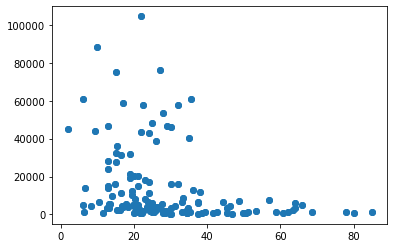

In [27]:
Violence_on_women = df_violences.Value
GDP_per_capita = df_violences.GDP_per_capita_2019

plt.scatter(Violence_on_women, GDP_per_capita)
plt.show()

Relation décroissante entre le PIB et les violences faites aux femmes. 

#### Testons le lien entre les responsabilités dans le ménage (via la variable DF_HR_PRACT: Ratio femmes/hommes du temps consacré aux tâches domestiques) et le PIB des pays.

In [28]:
df_domestique=df_oecd_gdp[df_oecd_gdp['VAR']=="DF_HR_PRACT"]
df_domestique

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
0,AUS,Australia,ÃlevÃ©,DF_HR_PRACT,1.82,58923.208212
9,AUT,Austria,ÃlevÃ©,DF_HR_PRACT,1.95,46717.720729
19,BEL,Belgium,ÃlevÃ©,DF_HR_PRACT,1.55,42887.655132
29,CAN,Canada,ÃlevÃ©,DF_HR_PRACT,1.51,44958.088687
48,DNK,Denmark,ÃlevÃ©,DF_HR_PRACT,1.39,57553.131240
...,...,...,...,...,...,...
2949,UGA,Uganda,Tous les groupes de revenu,DF_HR_PRACT,3.88,898.407515
2974,URY,Uruguay,Tous les groupes de revenu,DF_HR_PRACT,2.32,16036.296403
2998,VNM,Vietnam,Tous les groupes de revenu,DF_HR_PRACT,1.48,2604.224166
3027,ZWE,Zimbabwe,Tous les groupes de revenu,DF_HR_PRACT,1.93,1367.676915


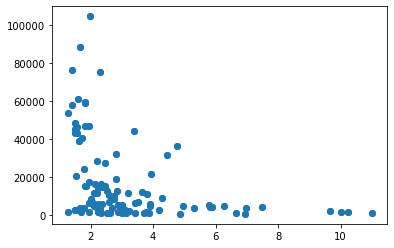

In [29]:
Repartition = df_domestique.Value
GDP_per_capita = df_domestique.GDP_per_capita_2019

plt.scatter(Repartition, GDP_per_capita)
plt.show()

Même conclusion que précédemment. De plus, certains pays riches pourraient encourager la présence de la femme au foyer. Relation exponentielle?

#### Testons le lien entre l'accès sécurisé à un compte en banque (via la variable RAPFR_SAFS_PRACT: part des femmes parmi les propriétaires d'un compte en banque) et le PIB des pays

In [30]:
df_banque=df_oecd_gdp[df_oecd_gdp['VAR']=="RAPFR_SAFS_PRACT"]
df_banque

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
4,AUS,Australia,ÃlevÃ©,RAPFR_SAFS_PRACT,50.0,58923.208212
14,AUT,Austria,ÃlevÃ©,RAPFR_SAFS_PRACT,51.1,46717.720729
24,BEL,Belgium,ÃlevÃ©,RAPFR_SAFS_PRACT,50.8,42887.655132
34,CAN,Canada,ÃlevÃ©,RAPFR_SAFS_PRACT,50.4,44958.088687
43,CZE,Czech Republic,ÃlevÃ©,RAPFR_SAFS_PRACT,47.8,20202.151592
...,...,...,...,...,...,...
3032,ZWE,Zimbabwe,Tous les groupes de revenu,RAPFR_SAFS_PRACT,42.4,1367.676915
3042,SRB,Serbia,Tous les groupes de revenu,RAPFR_SAFS_PRACT,50.2,6562.670592
3050,MNE,Montenegro,Tous les groupes de revenu,RAPFR_SAFS_PRACT,50.1,7684.151468
3055,XKO,NaN,Tous les groupes de revenu,RAPFR_SAFS_PRACT,40.2,NaN


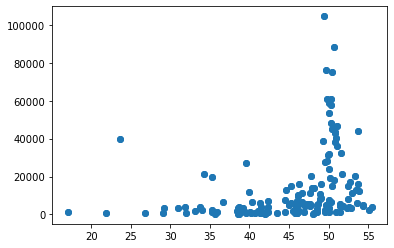

In [31]:
pourcentage = df_banque.Value
GDP_per_capita = df_banque.GDP_per_capita_2019

plt.scatter(pourcentage, GDP_per_capita)
plt.show()

Les valeurs élevées du PIB semblent reliées à une grande part de femmes disposant d'un compte en banque. PIB élevé = moitié des personnes disposant d'un compte en banque sont des femmes.

#### Testons le lien entre l'accès à la contraception (via la variable RPI_RA_PRACT: (% de femmes âges de 15 à 49 ans en couple ne désirant pas d’enfants dans l’immédiat et n’utilisent aucun moyen de contraception) et le PIB des pays

In [32]:
df_contraception=df_oecd_gdp[df_oecd_gdp['VAR']=="RPI_RA_PRACT"]
df_contraception.head(5)

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
3,AUS,Australia,ÃlevÃ©,RPI_RA_PRACT,11.0,58923.208212
12,AUT,Austria,ÃlevÃ©,RPI_RA_PRACT,10.0,46717.720729
22,BEL,Belgium,ÃlevÃ©,RPI_RA_PRACT,7.0,42887.655132
32,CAN,Canada,ÃlevÃ©,RPI_RA_PRACT,7.0,44958.088687
41,CZE,Czech Republic,ÃlevÃ©,RPI_RA_PRACT,4.3,20202.151592


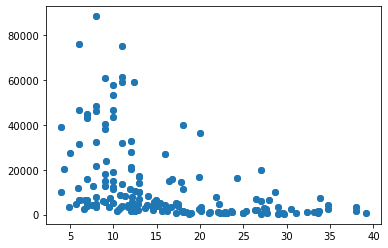

In [33]:
ptg_contraception = df_contraception.Value
GDP_per_capita = df_contraception.GDP_per_capita_2019

plt.scatter(ptg_contraception, GDP_per_capita)
plt.show()

#### Testons le lien entre le pourcentage de femmes qui déclarent avoir peur la nuit lorsqu'elles se déplacent seules (via la variable RCL_FM_PRACT) et le PIB des pays

In [34]:
df_peur=df_oecd_gdp[df_oecd_gdp['VAR']=="RCL_FM_PRACT"]
df_peur.head(5)

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
7,AUS,Australia,ÃlevÃ©,RCL_FM_PRACT,78.0,58923.208212
17,AUT,Austria,ÃlevÃ©,RCL_FM_PRACT,50.9,46717.720729
27,BEL,Belgium,ÃlevÃ©,RCL_FM_PRACT,73.4,42887.655132
37,CAN,Canada,ÃlevÃ©,RCL_FM_PRACT,80.4,44958.088687
46,CZE,Czech Republic,ÃlevÃ©,RCL_FM_PRACT,77.1,20202.151592


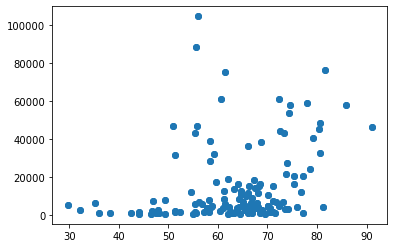

In [35]:
ptg_peur = df_peur.Value
GDP_per_capita = df_peur.GDP_per_capita_2019

plt.scatter(ptg_peur, GDP_per_capita)
plt.show()

Pas une variable très pertinente: biais de réponse peut-être, dépend des mentalités du pays, de la culture et pas forcément représentatif du danger qu'il y a. Ex: en Norvège, plus de 90% des femmes ont peur de sortir seule la nuit. 

#### Testons le lien entre la part de femmes occupant un poste de cadre (via la variable RAPFR_WR_PRACT) et le PIB des pays 

In [36]:
df_travail=df_oecd_gdp[df_oecd_gdp['VAR']=="RAPFR_WR_PRACT"]
df_travail.head(5)

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
5,AUS,Australia,ÃlevÃ©,RAPFR_WR_PRACT,36.6,58923.208212
15,AUT,Austria,ÃlevÃ©,RAPFR_WR_PRACT,31.8,46717.720729
25,BEL,Belgium,ÃlevÃ©,RAPFR_WR_PRACT,33.6,42887.655132
35,CAN,Canada,ÃlevÃ©,RAPFR_WR_PRACT,35.5,44958.088687
44,CZE,Czech Republic,ÃlevÃ©,RAPFR_WR_PRACT,24.6,20202.151592


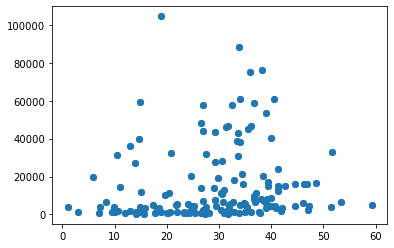

In [37]:
ptg_travail = df_travail.Value
GDP_per_capita = df_travail.GDP_per_capita_2019

plt.scatter(ptg_travail, GDP_per_capita)
plt.show()

Distribution normale?

In [38]:
df_politique=df_oecd_gdp[df_oecd_gdp['VAR']=="RCL_PV_PRACT"]
df_politique.head(5)

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
6,AUS,Australia,ÃlevÃ©,RCL_PV_PRACT,28.7,58923.208212
16,AUT,Austria,ÃlevÃ©,RCL_PV_PRACT,34.4,46717.720729
26,BEL,Belgium,ÃlevÃ©,RCL_PV_PRACT,38.0,42887.655132
36,CAN,Canada,ÃlevÃ©,RCL_PV_PRACT,27.0,44958.088687
45,CZE,Czech Republic,ÃlevÃ©,RCL_PV_PRACT,22.0,20202.151592


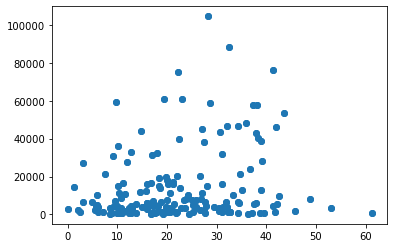

In [39]:
ptg_politique = df_politique.Value
GDP_per_capita = df_politique.GDP_per_capita_2019

plt.scatter(ptg_politique, GDP_per_capita)
plt.show()

Distribution normale pour les pays pauvres?

#### Testons le lien entre la ppréférence pour les garçons (via la variable RPI_MW_PRACT: nb de garçons pour 100 filles dans la classe d'âge 0-4 ans) et le PIB des pays 

In [40]:
df_mw=df_oecd_gdp[df_oecd_gdp['VAR']=="RPI_MW_PRACT"]
df_mw.head(5)

,Country Code,Country Name,Revenu,VAR,Value,GDP_per_capita_2019
2,AUS,Australia,ÃlevÃ©,RPI_MW_PRACT,105.5,58923.208212
11,AUT,Austria,ÃlevÃ©,RPI_MW_PRACT,106.2,46717.720729
21,BEL,Belgium,ÃlevÃ©,RPI_MW_PRACT,104.7,42887.655132
31,CAN,Canada,ÃlevÃ©,RPI_MW_PRACT,105.1,44958.088687
40,CZE,Czech Republic,ÃlevÃ©,RPI_MW_PRACT,105.7,20202.151592


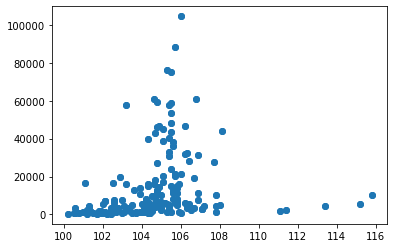

In [41]:
ptg_mw = df_mw.Value
GDP_per_capita = df_mw.GDP_per_capita_2019

plt.scatter(ptg_mw, GDP_per_capita)
plt.show()

Bof, interprétation non pertinente? Nombre de garçons pour 100 filles dans la classe d'âge 0-4 ans. Il nous faudrait des infos supplémentaires.